In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,OrdinalEncoder
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("type of the Diamond new.csv")
df.head(5)

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58


In [4]:
df.shape

(53940, 10)

In [12]:
df.columns

Index(['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'price',
       'x (Premium)', 'z (Very Good)', 'y (Good)'],
      dtype='object')

In [5]:
df['cut'].unique()

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [6]:
df['color'].unique()

array(['E', 'F', 'H', 'G', 'J', 'I', 'D'], dtype=object)

In [7]:
df['clarity'].unique()

array(['VS2', 'SI2', 'SI1', 'I1', 'VVS1', 'VS1', 'IF', 'VVS2'],
      dtype=object)

The clarity grades of diamonds, ordered from worst (bad) to best, are as follows:
I1 (Included 1) – Lowest clarity, visible inclusions
SI2 (Slightly Included 2) – More noticeable inclusions
SI1 (Slightly Included 1) – Slightly fewer inclusions than SI2
VS2 (Very Slightly Included 2) – Minor inclusions visible under magnification
VS1 (Very Slightly Included 1) – Fewer inclusions than VS2
VVS2 (Very, Very Slightly Included 2) – Very hard to see inclusions
VVS1 (Very, Very Slightly Included 1) – Even fewer inclusions than VVS2
IF (Internally Flawless) – No internal flaws, only possible surface blemishes

Final Order (Worst to Best):
I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF

Diamond Color Scale (Best to Worst)
Grade	Description
D	Absolutely colorless (rarest and most valuable)
E	Colorless (minimal traces of color, undetectable to the naked eye)
F	Colorless (slight color detectable by an expert, still high quality)
G-H	Near-colorless (looks white to the naked eye, good value)
I-J	Near-colorless (slightly detectable warmth/tint)
K-M	Faint yellow (visible tint)
N-R	Very light yellow
S-Z	Light yellow/brown (least desirable for white diamonds)

Order from Best to Worst:
D > E > F > G > H > I > J > K > L > M > N ... Z

In [8]:
oe_cut = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]) # Worst to best
oe_color = OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']])  # Worst to best
oe_clarity = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])  # Worst to best

df[["cut"]] = oe_cut.fit_transform(df[["cut"]])
df[["color"]] = oe_color.fit_transform(df[["color"]])
df[["clarity"]] = oe_clarity.fit_transform(df[["clarity"]])

In [9]:
df[['cut','color','clarity']].head()

,cut,color,clarity
0,0.0,5.0,3.0
1,0.0,5.0,1.0
2,0.0,4.0,1.0
3,0.0,4.0,3.0
4,0.0,4.0,3.0


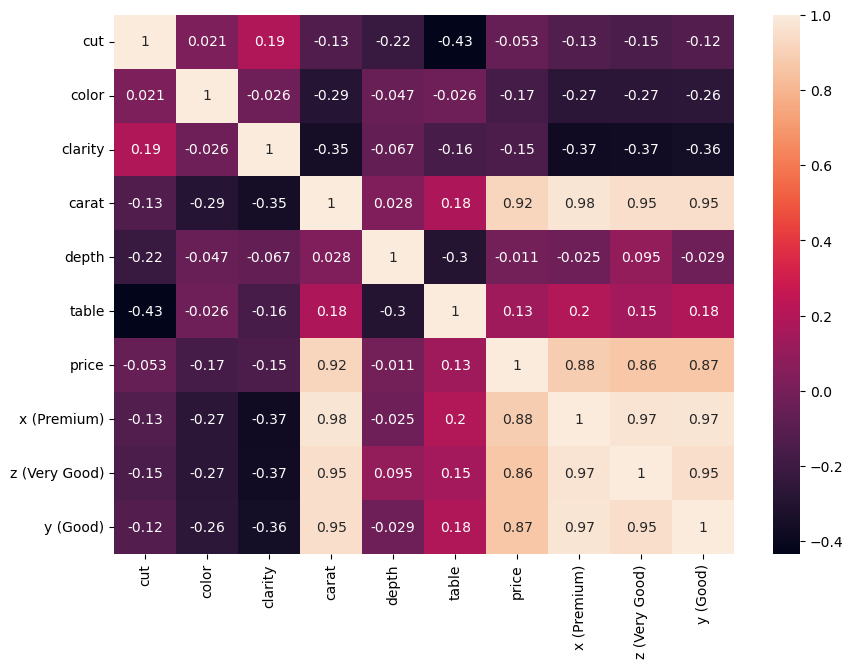

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

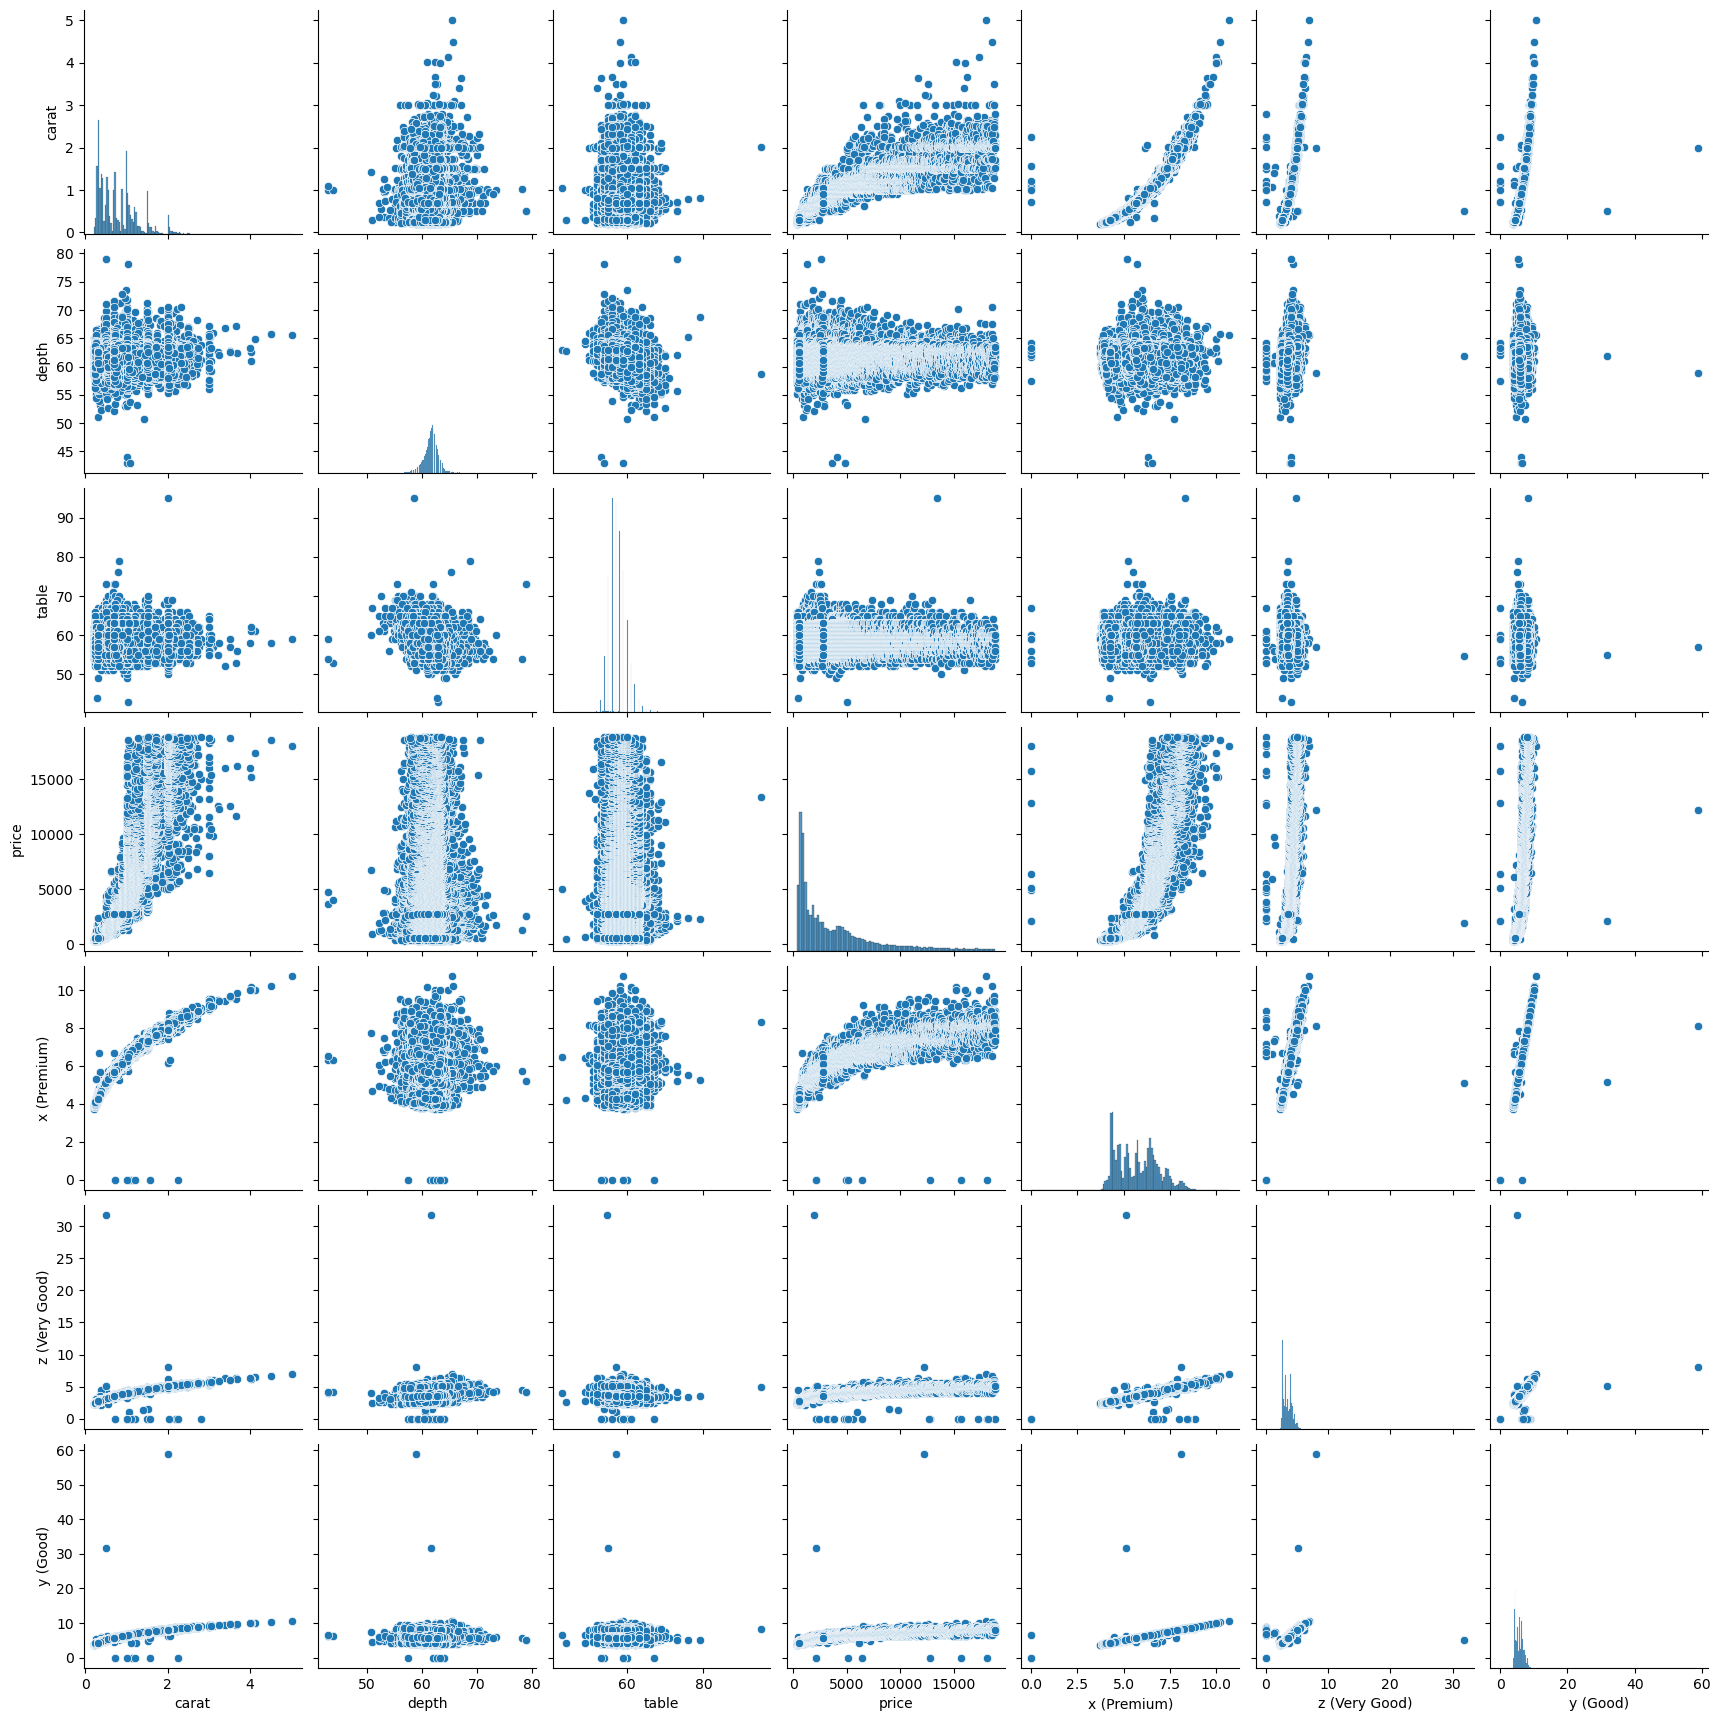

In [14]:
import seaborn as sns
sns.pairplot(data=df[['carat', 'depth', 'table', 'price',
       'x (Premium)', 'z (Very Good)', 'y (Good)']])

In [125]:
x=df.drop(["price"],axis=1)
y=df["price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [126]:
x.head(2)

,cut,color,clarity,carat,depth,table,x (Premium),z (Very Good),y (Good)
0,0.0,5.0,3.0,0.22,65.1,61.0,3.87,2.49,3.78
1,0.0,5.0,1.0,0.86,55.1,69.0,6.45,3.52,6.33


In [127]:
df.describe()

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,2.904097,3.405803,3.051020,0.797940,61.749405,57.457184,3932.799722,5.731157,3.538734,5.734526
std,1.116600,1.701105,1.647136,0.474011,1.432621,2.234491,3989.439738,1.121761,0.705699,1.142135
min,0.000000,0.000000,0.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,0.400000,61.000000,56.000000,950.000000,4.710000,2.910000,4.720000
50%,3.000000,3.000000,3.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,3.530000,5.710000
75%,4.000000,5.000000,4.000000,1.040000,62.500000,59.000000,5324.250000,6.540000,4.040000,6.540000
max,4.000000,6.000000,7.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,31.800000,58.900000


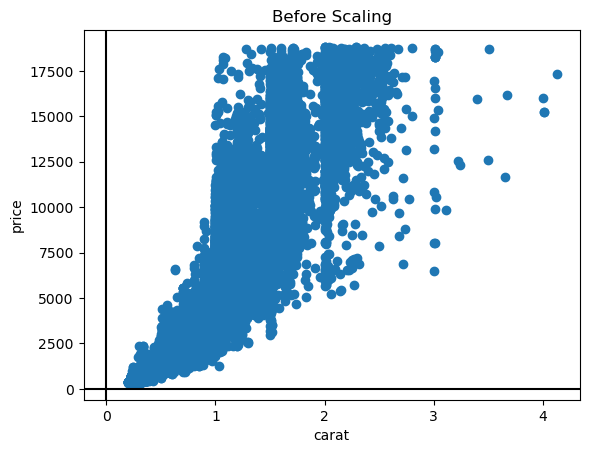

In [128]:
plt.scatter(x_train['carat'],y_train)
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Before Scaling')
# plt.set_xlim(-10,70)
# plt.set_ylim(-30000,180000)
plt.axvline(x=0, color='black') 
plt.axhline(y=0, color='black') 

plt.show()

In [ ]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8
count,4.315200e+04,4.315200e+04,4.315200e+04,4.315200e+04,4.315200e+04,4.315200e+04,4.315200e+04,4.315200e+04,4.315200e+04
mean,7.623778e-17,1.389734e-16,-3.227345e-17,-2.366171e-16,4.169202e-15,-3.029752e-17,-8.659493e-16,1.249443e-15,-4.885475e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.606396e+00,-1.997939e+00,-1.852186e+00,-1.257260e+00,-7.666260e+00,-6.466157e+00,-5.096685e+00,-4.981147e+00,-5.105058e+00
25%,-8.131261e-01,-8.245858e-01,-6.389688e-01,-8.362381e-01,-5.249911e-01,-6.496423e-01,-9.062117e-01,-8.829292e-01,-9.007336e-01
50%,8.350890e-02,-2.379091e-01,-3.236033e-02,-2.047056e-01,3.510843e-02,-2.022181e-01,-3.430855e-02,-2.385258e-02,-2.780198e-02
75%,9.801439e-01,9.354441e-01,5.742482e-01,5.110312e-01,5.251955e-01,6.926304e-01,7.219339e-01,7.084750e-01,7.204252e-01
max,9.801439e-01,1.522121e+00,2.394074e+00,7.015816e+00,1.207725e+01,9.641115e+00,3.924843e+00,3.980350e+01,2.322068e+01


In [157]:
ss.mean_[3:5]

array([ 0.79724231, 61.749854  ])

In [138]:
x_train[:,3].shape

(43152,)

In [139]:
y_train.shape

(43152,)

In [163]:
ss1 = StandardScaler()
y_train_scaled = ss1.fit_transform(y_train.values.reshape(-1, 1) )

In [166]:
ss1.mean_

array([3930.86392288])

In [164]:
y_train_scaled.shape

(43152, 1)

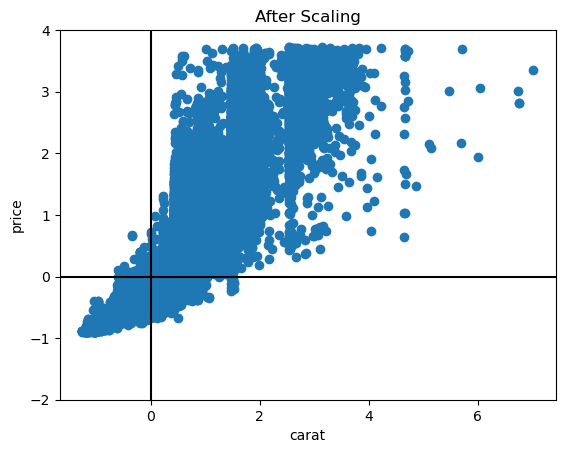

In [173]:

plt.scatter(x_train[:,3],y_train_scaled)
plt.xlabel('carat')
plt.ylabel('price')
plt.title('After Scaling')
# plt.xlim(-10,70)
plt.ylim(-2,4)
plt.axvline(x=0, color='black') 
plt.axhline(y=0, color='black') 

plt.show()

In [174]:
df.columns

Index(['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'price',
       'x (Premium)', 'z (Very Good)', 'y (Good)'],
      dtype='object')

In [175]:
X=df[['cut', 'color', 'clarity', 'carat', 'depth', 'table','x (Premium)', 'z (Very Good)', 'y (Good)']]
y=df['price']

In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [177]:
ss=StandardScaler()
x=df.drop(["price"],axis=1)
y=df["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
# # Linear Regression
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_test, pred)
# print("Linear Regression =", mse)

# # RandomForestRegressor
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# mse = mean_squared_error(y_test, pred)
# print("Random Forest Regressor =", mse)

# # Decision Tree Regressor
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# mse = mean_squared_error(y_test, pred)
# print("Decision Tree Regressor =", mse)

# # Polynomial Regression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# # Transform the features for polynomial regression
# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X_train)

# # Train a Linear Regression model on polynomial features
# model = LinearRegression()
# model.fit(X_poly, y_train)
# X_test_poly = poly.transform(X_test)
# pred = model.predict(X_test_poly)

# mse = mean_squared_error(y_test, pred)
# print("Polynomial Regression =", mse)


# # K-Nearest Neighbors Regression
# from sklearn.neighbors import KNeighborsRegressor
# model = KNeighborsRegressor()
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# mse = mean_squared_error(y_test, pred)
# print("K-Nearest Neighbors Regression =", mse)

# # Gradient Boosting Regressor
# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor()
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# mse = mean_squared_error(y_test, pred)
# print("Gradient Boosting Regressor =", mse)

# # AdaBoost Regressor
# from sklearn.ensemble import AdaBoostRegressor
# model = AdaBoostRegressor()
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# mse = mean_squared_error(y_test, pred)
# print("AdaBoost Regressor =", mse)


Linear Regression = 1587497.4725438703
Random Forest Regressor = 305151.38252313697
Decision Tree Regressor = 562941.4939747868
Polynomial Regression = 33004303.741028473
K-Nearest Neighbors Regression = 796303.2577233963
Gradient Boosting Regressor = 410574.86079974304
AdaBoost Regressor = 1320425.3951161562


In [179]:
models={
    "Random Forest Regresion":RandomForestRegressor(),
     "Ada Boost Regression":AdaBoostRegressor(),
    "Gradient Boost Regression":GradientBoostingRegressor(),
    "Linear Regression":LinearRegression()
}

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=r2_score(y_test,y_pred)
    print(f"{name}")
    print(f"{accuracy*100}")

Random Forest Regresion
98.04418190066397
Ada Boost Regression
91.12692332583731
Gradient Boost Regression
97.36550679806908
Linear Regression
89.8146503242706


In [180]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print("Random Forest Regressor =", mse)

Random Forest Regressor = 304240.10795767914


In [185]:
model.score(X_test,y_test) *100

98.04800200408194

In [181]:
model.predict([[0,	2,	3,	0.96,	66.3,	62.0,	6.27,	4.07,	5.95]])

/home/harsh/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3551.71666667])